# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

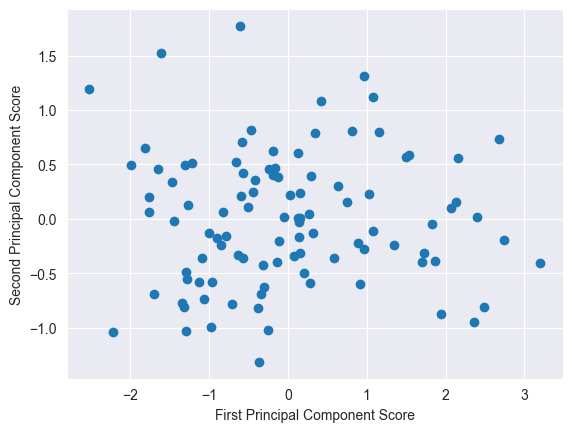

In [1]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

## What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score? What does that mean about their values in series_1, series_2, and series_3?

The three outliers in the upper left corner had their series_3 sharply decline, while series_1 and series_2 stayed normal. By looking at PC1, `[0.265, 0.301, 0.916]`, series_3 has a very high coefficient at `0.916` compared to the other two. Since PC1 is negative, this means that series_3 must be very negative. This is because `PC1 = 0.265×ser1 + 0.301×ser2 + 0.916×ser3`. Since all the coefficients are positive, the total can only be negative if series_3 is very negative due to how large it is compared to the other values. By looking at PC2, `[0.603, 0.689, -0.401]`, series_3 has a negative coefficient at `-0.401` compared to the other two. Since PC2 is positive, this means that series_3 is more negative compared to the other two. Essentially since PC2 is positive for the outliers, it means that the value of series_3 outweighs the combination of series_1 and series_2 to push it to be positive. The negative series_3 value actually adds to the positive PC2 score.

Using mock values we can see that below.
```
PC1 = 0.265×(0.55) + 0.301×(0.55) + 0.916×(-1.98) = -1.502
PC2 = 0.603×(0.55) + 0.689×(0.55) - 0.401×(-1.98) = 1.505
```

To summarize, PC1 had a low (negative) score since they are on the left. PC2 had a high (positive) score since they are on the top.

## It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

It's hard to distinguish series_1 and series_2 due to how the data was generated. Since series_2 is essentially series_1 with only 10% noise compared to series_3 having 50% noise, series_1 and series_2 are highly correlated. PC1 gives them similar weights with 0.265 and 0.301. PC2 gives them similar weights as well with 0.603 and 0.689. Additionally, looking at the explained variance ratio (`[0.79916477 0.18990532 0.01092991]`), series_3 only accounts for 1.1% of the total variance.

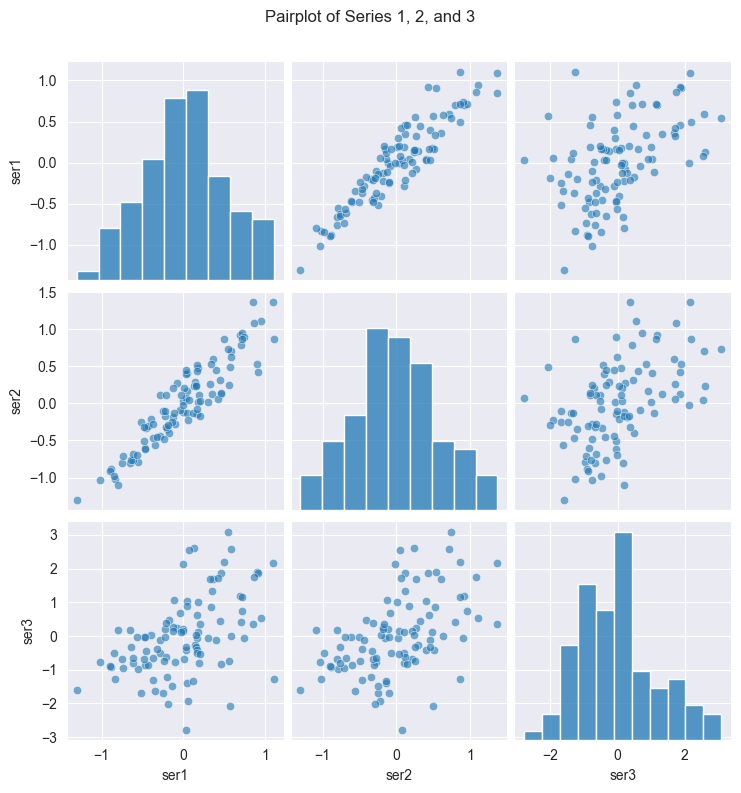

In [9]:
import seaborn as sns

g = sns.pairplot(df[['ser1', 'ser2', 'ser3']],
                 diag_kind='hist',
                 plot_kws={'alpha': 0.6})

g.fig.suptitle('Pairplot of Series 1, 2, and 3', y=1.05)
plt.show()

We can clearly see with the pairplot that series_1 and series_2 have a strong linear relationship. We can also see that series_1 and series_2 have a wider almost cloud like relationship with series_3. This is due to the 50% noise. You really cannot distinguish between series_1 and series_2 at all due to the fact there's only 10% noise.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.